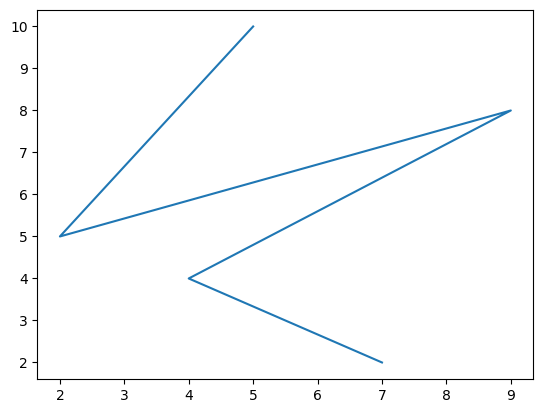

In [1]:
# importing matplotlib module 
from matplotlib import pyplot as plt 
 
# x-axis values 
x = [5, 2, 9, 4, 7] 
 
# Y-axis values 
y = [10, 5, 8, 4, 2] 
 
# Function to plot 
plt.plot(x, y) 
 
# function to show the plot 
plt.show()

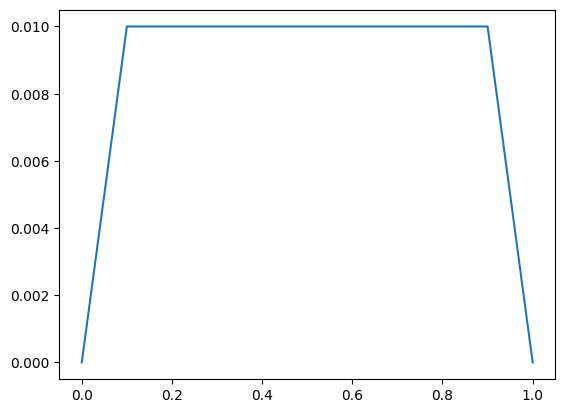

In [2]:
# coding: utf-8
"""Solving the vibrating string in Python with FEniCS
Author: Juan Luis Cano Rodríguez <juanlu@pybonacci.org>
References
----------
* Zachmanoglou, E. C., and Dale W. Thoe. "Introduction to Partial Differential
  Equations with Applications". New York: Dover Publications, 1986.
"""
import numpy as np
from numpy import cos, sin, pi

# from sympy import Symbol
# from sympy.plotting import plot


from matplotlib import pyplot as plt 

def u(x, t0, L, a, prec=1e-7):
    x = np.asarray(x)
    uu = np.zeros_like(x)
    nn = 0
    while True:
        uu_ = ((-1) ** nn *
               sin((2 * nn + 1) * pi * x / L) *
               cos((2 * nn + 1) * pi * t0 / L) /
               (2 * nn + 1) ** 2)
        uu += uu_
        if np.all(np.abs(uu_ / a) < prec):
            break
        nn += 1
    uu *= 8 * a / pi**2
    return uu


L = 1.0  # m
a = 0.05  # m
t0 = 0.0  # s
dt = 0.05 # s
x = np.linspace(0, L, num=101)
def anim(i):
    line.set_data(x, u(x, t0 + i * dt, L, a))
    return line
#     fig = plt.gcf()
#     line, = plt.plot(x, u(x, t0, L, a, prec=1e-9))
#     plt.ylim(-a * 2, a * 2)
#     animate = animation.FuncAnimation(fig, anim, range(40), repeat=True, blit=False)
#     plt.show()
#animate.save('string.mp4', fps=90)

y = u(x, t0+8*dt, L, a, prec=1e-9)

plt.plot(x, y)
plt.show()